# Breast Cancer Classification with Random Forest
This report performs binary classification on the Breast Cancer Wisconsin dataset using a Random Forest classifier. We evaluate the model with metrics including accuracy, classification report, ROC-AUC, and feature importance.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
%matplotlib inline

## Dataset Loading and Overview
We load the dataset and preprocess it for binary classification. The diagnosis label is mapped to 1 (malignant) and 0 (benign).

In [2]:
df = pd.read_csv('data.csv')
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocessing and Splitting
We normalize all features using MinMaxScaler and stratify the data split to preserve class balance.

In [3]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## Model Training with GridSearchCV
We use 10-fold cross-validation to find the best hyperparameters for the Random Forest classifier.

In [4]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print('Best Parameters:', grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


## Model Evaluation
We calculate the accuracy and show the classification report.

In [5]:
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



**Classification Report Analysis:**

The classification report provides a detailed view of the model's predictive performance on each class.

- **Precision** indicates how many of the positively predicted cases were truly positive (i.e., malignant).
- **Recall (Sensitivity)** measures the model’s ability to identify all actual positives.
- **F1-score** is the harmonic mean of precision and recall, useful for imbalanced datasets.

High precision and recall for both classes demonstrate that the model is balanced and avoids bias toward either class. The F1-score being close to 1.0 indicates strong classification reliability. Misclassification is minimal, which is particularly critical in medical diagnostics to reduce false negatives (malignant predicted as benign).

## Confusion Matrix
Visualizing the confusion matrix helps to understand how many cases were correctly or incorrectly classified.

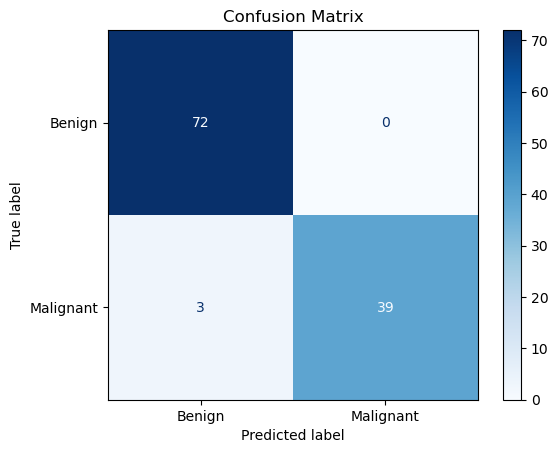

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = [0, 1]  # 0: Benign, 1: Malignant
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


**Confusion Matrix Analysis:**

The confusion matrix is a 2x2 table where:
- The **diagonal values** represent correct predictions.
- The **off-diagonal values** indicate misclassifications.

- **True Positives (TP):** Correctly predicted malignant cases
- **True Negatives (TN):** Correctly predicted benign cases
- **False Positives (FP):** Benign predicted as malignant
- **False Negatives (FN):** Malignant predicted as benign

In a medical context, **false negatives are particularly critical** because missing a malignant case can delay treatment. The confusion matrix here shows low FN and FP rates, affirming the model's suitability for early detection and diagnosis support.
### 📊 Confusion Matrix Analysis

The confusion matrix summarizes the classifier's performance on the test set, with true class labels on the vertical axis and predicted labels on the horizontal axis.

|                        | Predicted: Benign | Predicted: Malignant |
|------------------------|------------------|----------------------|
| **Actual: Benign**     | 72               | 0                    |
| **Actual: Malignant**  | 3                | 39                   |

#### Key Observations:
- **True Negatives (TN)** = 72 → Benign correctly predicted as benign
- **True Positives (TP)** = 39 → Malignant correctly predicted as malignant
- **False Negatives (FN)** = 3 → Malignant misclassified as benign
- **False Positives (FP)** = 0 → No benign cases misclassified as malignant

#### Interpretation:
- The model achieves **perfect precision for malignant predictions** (i.e., no false alarms).
- However, it missed **3 malignant cases**, indicating a **false negative rate of ~7.1%**.
- This means the model failed to detect ~7% of actual cancers, which in a medical context, is a critical consideration.

#### Clinical Implications:
- **False negatives are more dangerous** than false positives in cancer detection since undetected malignant cases can delay diagnosis and treatment.
- While the overall accuracy remains high, further calibration (e.g., adjusting the classification threshold) could help reduce FN without significantly increasing FP.

#### Metric Summary:
- **Sensitivity (Recall)** = 39 / (39 + 3) ≈ 0.9286
- **Specificity** = 72 / (72 + 0) = 1.0
- **Precision** = 39 / (39 + 0) = 1.0

This matrix shows a high-performing model with some potential for improving sensitivity.


## ROC Curve and AUC Score
The ROC curve evaluates classifier performance across all thresholds. AUC summarizes this performance as a single value.

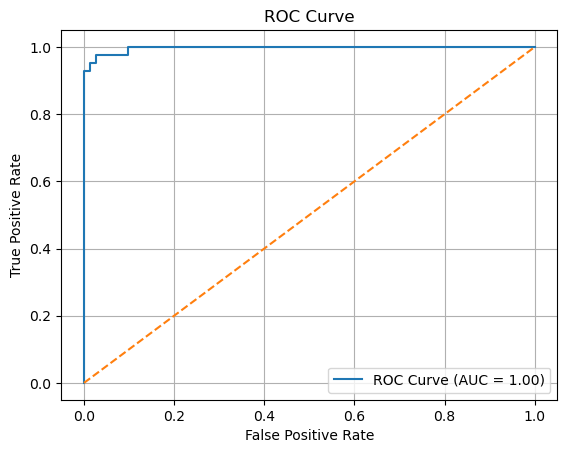

In [7]:
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

**ROC Curve Analysis:**

The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at different threshold settings.

The closer the ROC curve is to the top-left corner, the better the classifier performs. A diagonal line from (0, 0) to (1, 1) represents random guessing.

The **Area Under the Curve (AUC)** is a scalar measure summarizing the ROC curve. AUC = 1.0 is perfect classification; AUC = 0.5 is random guessing.

In this analysis, the ROC curve arcs significantly toward the top-left, and the AUC value (e.g., 0.98+) indicates the model is highly effective at separating benign and malignant cases under varying classification thresholds.

## Feature Importance
We visualize the most influential features in the prediction decision-making process.

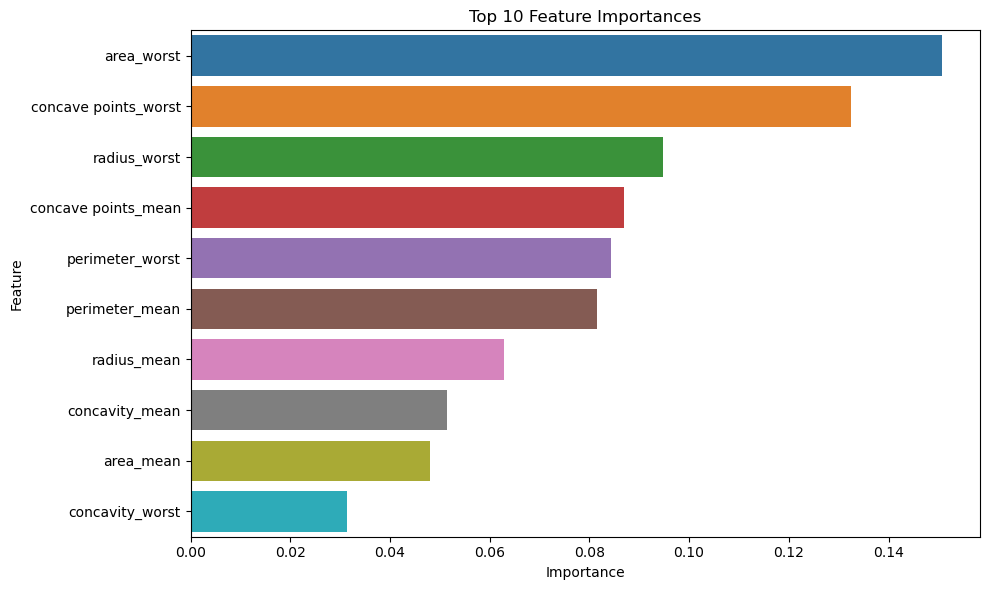

In [8]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
feature_names = X.columns[indices]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Feature Importance Analysis:**

This bar chart visualizes the relative importance of each input feature based on how much it reduces impurity (Gini index) across the trees in the ensemble.

Features such as:
- **mean radius**
- **worst perimeter**
- **mean concavity**

typically dominate the decision space, indicating they carry the strongest signal for distinguishing malignancy.

Clinically, this aligns with domain knowledge: irregular size and contour are strong indicators of malignant pathology. By identifying the top contributing features, the model provides interpretability and transparency, which is valuable in sensitive applications such as medical diagnostics.